In [15]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Graficos

In [16]:
df = pd.read_csv("../datos/df_modificado.csv", index_col = 0)


df.head(5)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,remotework
0,52,No,non-travel,2015.7,desconocido,6,3,desconocido,1,1,1,M,252.0,3,5,research director,3,desconocido,16280.83,42330.17,7,No,13,3.0,3,full time,0,NaN,5,3.0,20,15,15,16280.83,1972,195370.0,desconocido,True
1,53,No,non-travel,2063.4,desconocido,1,4,life sciences,1,2,3,M,257.9,2,5,manager,3,desconocido,NaN,43331.17,0,Desconocido,14,3.0,1,full time,1,34.0,5,3.0,33,11,9,NaN,1971,199990.0,desconocido,False
2,43,No,travel_rarely,1984.3,research & development,4,2,technical degree,1,3,3,M,248.0,3,5,manager,4,married,NaN,41669.33,1,No,11,3.0,4,full time,0,22.0,3,NaN,22,11,15,NaN,1981,192320.0,manager - research & development,False
3,48,No,travel_rarely,1771.4,desconocido,2,4,medical,1,4,1,F,221.4,3,4,research director,3,married,14307.50,37199.50,3,Desconocido,19,3.0,2,full time,2,NaN,2,NaN,20,5,6,14307.50,1976,171690.0,desconocido,False
4,47,No,non-travel,1582.8,desconocido,3,3,technical degree,1,5,1,F,197.8,4,4,sales executive,1,divorced,12783.92,33238.20,2,No,12,3.0,4,full time,1,NaN,5,3.0,19,2,8,12783.92,1977,NaN,desconocido,True


In [17]:
df["worklifebalance"].dtype

dtype('float64')

In [18]:
porc_nulos = (df.isnull().sum() / df.shape[0]) * 100
porc_nulos

age                          0.000000
attrition                    0.000000
businesstravel               0.000000
dailyrate                    0.000000
department                   0.000000
distancefromhome             0.000000
education                    0.000000
educationfield               0.000000
employeecount                0.000000
employeenumber               0.000000
environmentsatisfaction      0.000000
gender                       0.000000
hourlyrate                   0.000000
jobinvolvement               0.000000
joblevel                     0.000000
jobrole                      0.000000
jobsatisfaction              0.000000
maritalstatus                0.000000
monthlyincome               29.141836
monthlyrate                  0.000000
numcompaniesworked           0.000000
overtime                     0.000000
percentsalaryhike            0.000000
performancerating           11.918951
relationshipsatisfaction     0.000000
standardhours                0.000000
stockoptionl

In [19]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])
# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
monthlyincome,29.141836
performancerating,11.918951
totalworkingyears,32.717521
worklifebalance,6.793802
sameasmonthlyincome,29.141836
salary,16.984505


In [26]:
columnas = df.describe().columns
columnas

Index(['age', 'dailyrate', 'distancefromhome', 'education', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome',
       'monthlyrate', 'numcompaniesworked', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'sameasmonthlyincome', 'datebirth', 'salary'],
      dtype='object')

In [57]:
columnas2 = ["salary", "percentsalaryhike", "worklifebalance", "distancefromhome", "dailyrate", "totalworkingyears", "yearssincelastpromotion", "monthlyincome"]

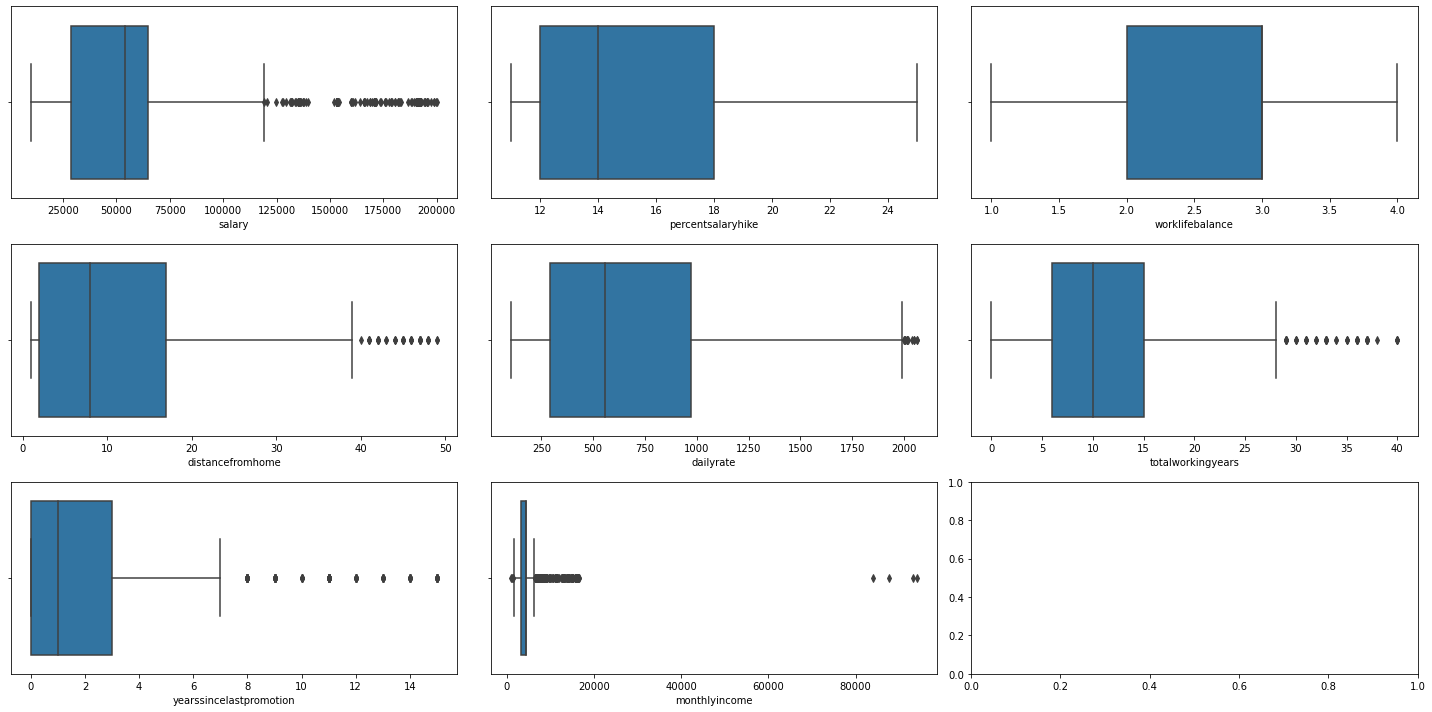

In [58]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,10)) 
axes = axes.flat
for indice, col in enumerate(columnas2):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout();

In [36]:
mediana_salary = df["salary"].median()

In [37]:
df["salary"] = df["salary"].fillna(mediana_salary)

In [39]:
df["salary"].describe()[["mean", "50%"]]

mean    65070.911587
50%     53914.110000
Name: salary, dtype: float64

---

In [46]:
mediana_monthlyincome = df["monthlyincome"].median()

In [47]:
df["monthlyincome"] = df["monthlyincome"].fillna(mediana_monthlyincome)

In [48]:
df["monthlyincome"].describe()[["mean", "50%"]]

mean    5331.763159
50%     4492.840000
Name: monthlyincome, dtype: float64

---

In [52]:
mediana_worklifebalance = df["worklifebalance"].mean()

In [53]:
df["worklifebalance"] = df["worklifebalance"].fillna(mediana_worklifebalance)

In [54]:
df["worklifebalance"].describe()[["mean", "50%"]]

mean    2.759591
50%     3.000000
Name: worklifebalance, dtype: float64

---

# df-Satisfecho / df-No Satisfecho

In [ ]:
job_satisfecha = df[df['jobsatisfaction'] == 'basic 4y']["income"]
job_no_satisfecha = df[df['jobsatisfaction'] == 'high school']["income"]